# Calculating the Ellipticity-Ellipticity Galaxy-Mass Correlation Functions

### Spencer Everett, SLAC, 7/16/2015

First import all of the necessary files:

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
import os,sys
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import cmath
import treecorr
import copy
%matplotlib inline

In [3]:
# Pangloss:
PANGLOSS_DIR = os.path.expandvars("$PANGLOSS_DIR")
sys.path.append(PANGLOSS_DIR)
import pangloss

In [4]:
K = pangloss.Kappamap(PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa.fits')

In [5]:
S = pangloss.Shearmap([PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1',PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

## Using the module directly:

In [6]:
#d=[1.9,-1.9,-1.9,1.9]
#d = [1.9,1.8,-1.9,-1.8]
B = pangloss.BackgroundCatalog(sigma_e=0.1,field=[0,0,0,0])
B.lens_by_map(K,S)
galaxies = B.galaxies
print B.galaxy_count

36000


In [15]:
# Need this to remove galaxies not contained in the K/S maps:
#galaxies = [B.galaxies[i] for i in range(B.galaxy_count) if not np.isnan(B.galaxies[i]).any()]
#print np.shape(galaxies)

## xi_+ and xi_x Correlation

In [7]:
gg_int = B.calculate_corr(lensed='none')
gg = B.calculate_corr()

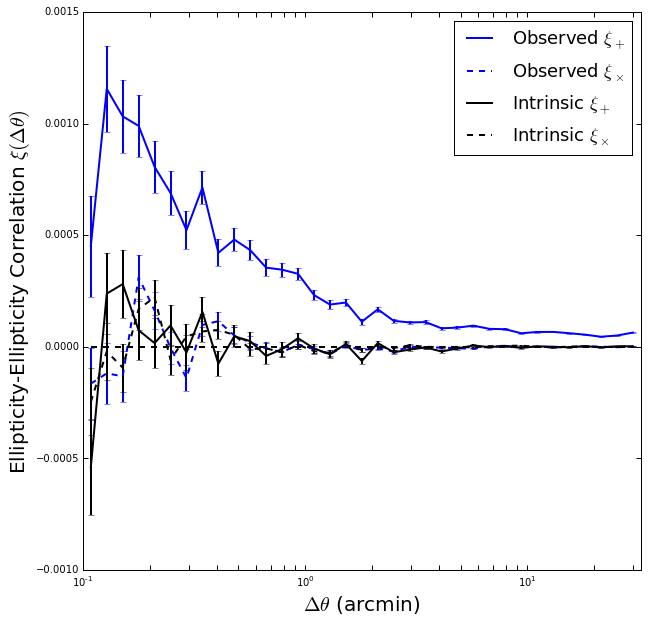

In [8]:
pangloss.plotting.plot_corr(gg,corr_type='gg',corr_comp='plus',lensed='map',color='blue')
pangloss.plotting.plot_corr(gg,corr_type='gg',corr_comp='cross',lensed='map',color='blue')
pangloss.plotting.plot_corr(gg_int,corr_type='gg',corr_comp='plus',lensed='none')
pangloss.plotting.plot_corr(gg_int,corr_type='gg',corr_comp='cross',lensed='none')

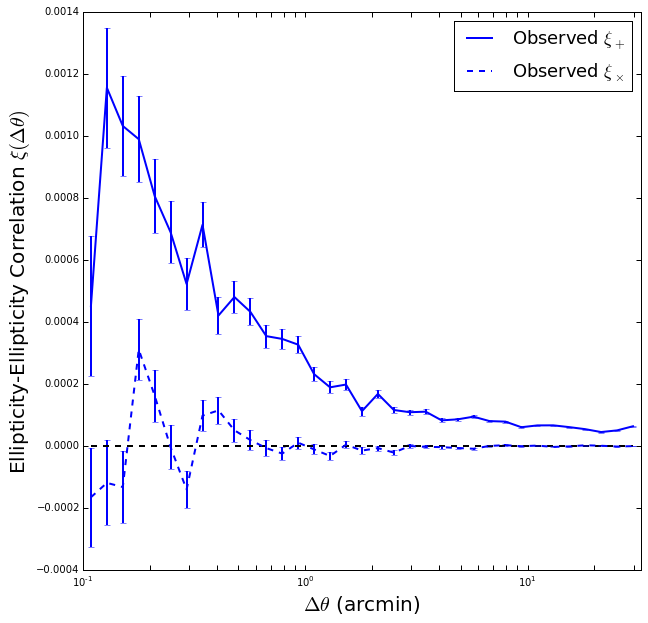

In [9]:
pangloss.plotting.plot_corr(gg,corr_type='gg',corr_comp='plus',lensed='map',color='blue')
pangloss.plotting.plot_corr(gg,corr_type='gg',corr_comp='cross',lensed='map',color='blue')

In [10]:
np.shape(B.gg_map.xip)

(35,)

In [11]:
del B

## Correlation with noise

In [12]:
# Domain size
d=[2.0,1.0,-2.0,-1.0]

B1 = pangloss.BackgroundCatalog(sigma_e=0.2,domain=d,field=[0,0,0,0])
B1.lens_by_map(K,S)
B2 = pangloss.BackgroundCatalog(sigma_e=0.2,domain=d,field=[0,0,0,0])
B2.lens_by_map(K,S)
B3 = pangloss.BackgroundCatalog(sigma_e=0.2,domain=d,field=[0,0,0,0])
B3.lens_by_map(K,S)
#B2 = copy.deepcopy(B1)
#B3 = copy.deepcopy(B1)

B1.add_noise(M=1.0)
galaxies1 = B1.galaxies

B2.add_noise(M=0.8)
galaxies2 = B2.galaxies

B3.add_noise(M=0.6)
galaxies3 = B3.galaxies

In [15]:
gg1 = B1.calculate_corr(max_sep=5)
gg2 = B2.calculate_corr(max_sep=5)
gg3 = B3.calculate_corr(max_sep=5)

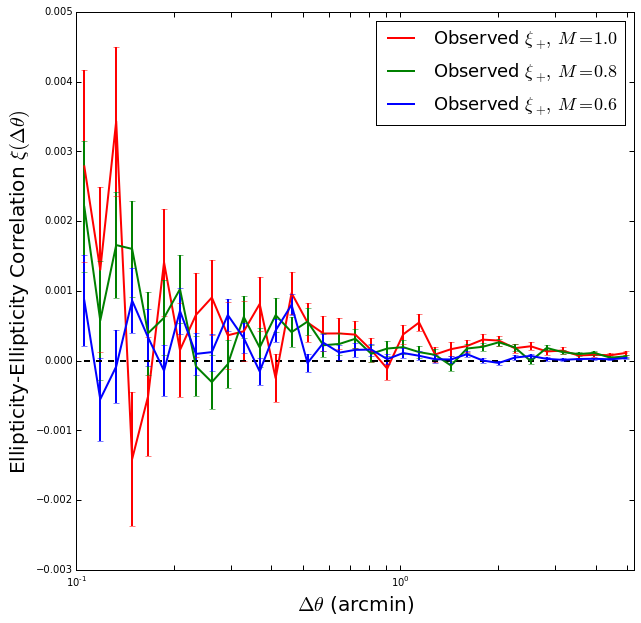

In [16]:
# This doesn't quite work yet! Need to add color plotting options for `plot_corr` and option for M plots
pangloss.plotting.plot_corr(gg1,corr_type='gg',corr_comp='plus',lensed='map',color='red',M=1.0)
pangloss.plotting.plot_corr(gg2,corr_type='gg',corr_comp='plus',lensed='map',color='green',M=0.8)
pangloss.plotting.plot_corr(gg3,corr_type='gg',corr_comp='plus',lensed='map',color='blue',M=0.6)

In [17]:
del B1
del B2
del B3

### Galaxy-Mass:

In [14]:
B = pangloss.BackgroundCatalog(sigma_e=0.01,field=[0,0,0,0])
B.lens_by_map(K,S)

config = pangloss.Configuration(PANGLOSS_DIR+'/example/example.config')
F = pangloss.ForegroundCatalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)
print F.galaxy_count

287822


In [20]:
ng_int = B.calculate_corr(corr_type='ng',foreground=F,lensed='none',max_sep=5)
ng = B.calculate_corr(corr_type='ng',foreground=F,lensed='map',max_sep=5)

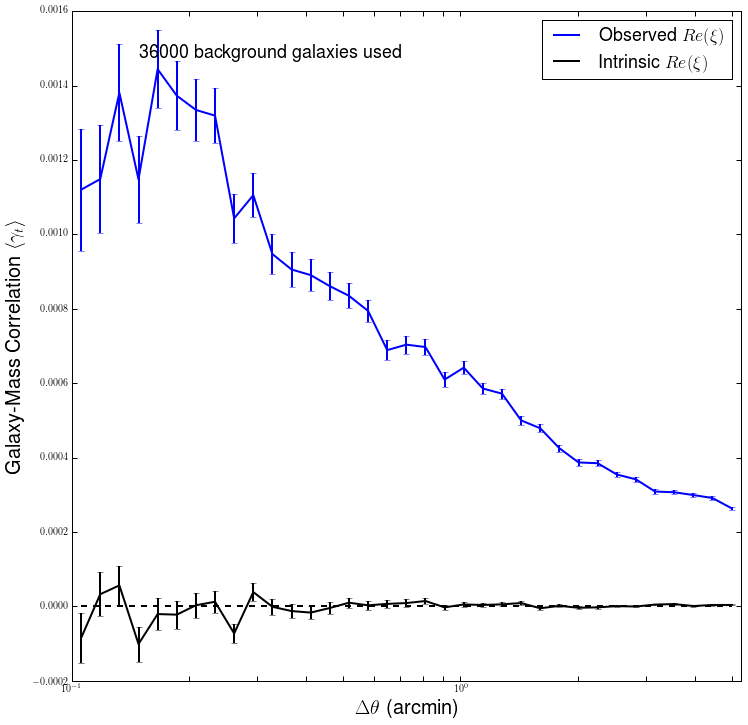

In [37]:
pangloss.plotting.plot_corr(ng,corr_type='ng',corr_comp='real',lensed='map',color='blue',galaxy_count=B.galaxy_count,fig_size=12)
pangloss.plotting.plot_corr(ng_int,corr_type='ng',corr_comp='real',lensed='none',color='black')

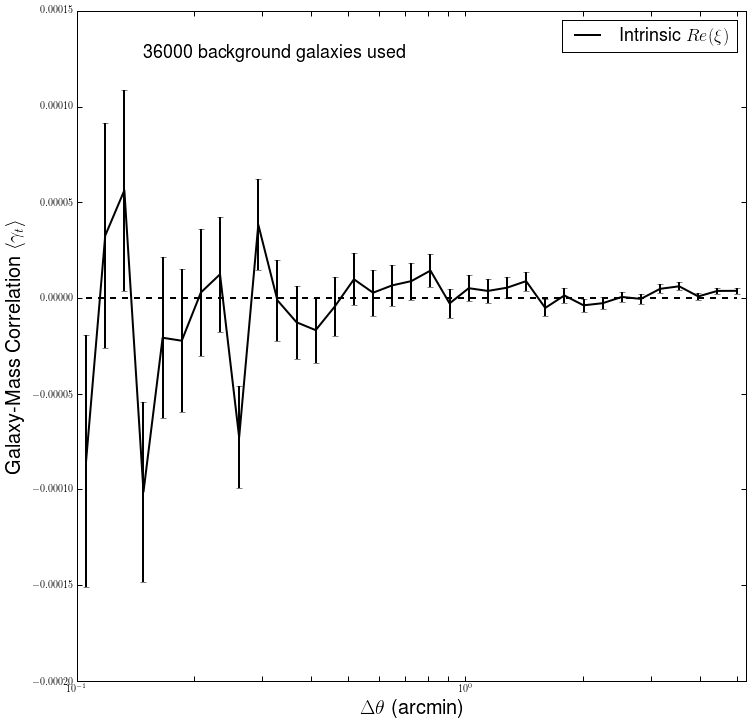

In [38]:
pangloss.plotting.plot_corr(ng_int,corr_type='ng',corr_comp='real',lensed='none',color='black',galaxy_count=B.galaxy_count,fig_size=12)

In [12]:
del B
del F

## Symmetry tests for $\xi_+$ and $\xi_\times^\prime$

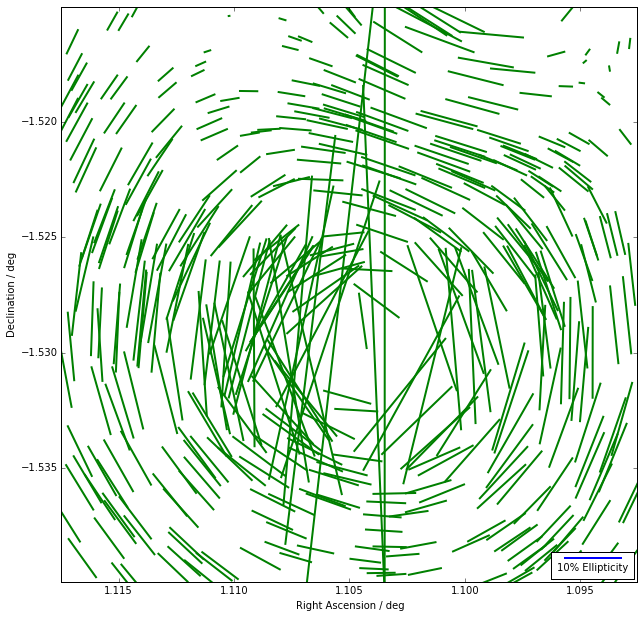

In [12]:
d = [1.1175,1.0925,-1.54,-1.515]
B = pangloss.BackgroundCatalog(N=200,sigma_e=0.0001,domain=d,field=[0,0,0,0])
B.lens_by_map(K,S)



gg = B.calculate_corr()

B.plot(graph='stick',lensed='map')
#print B.galaxies['eMod']
# Rotating all galaxy orientations in place by 45 degrees
B.galaxies['ePhi'] += 10.0
#B.galaxies['eMod'] *= 0.01
B.galaxies['e1'] = B.galaxies['eMod']*np.cos(np.deg2rad(2.0*B.galaxies['ePhi']))
B.galaxies['e2'] = B.galaxies['eMod']*np.sin(np.deg2rad(2.0*B.galaxies['ePhi']))
#print B.galaxies['eMod']

gg45 = B.calculate_corr()

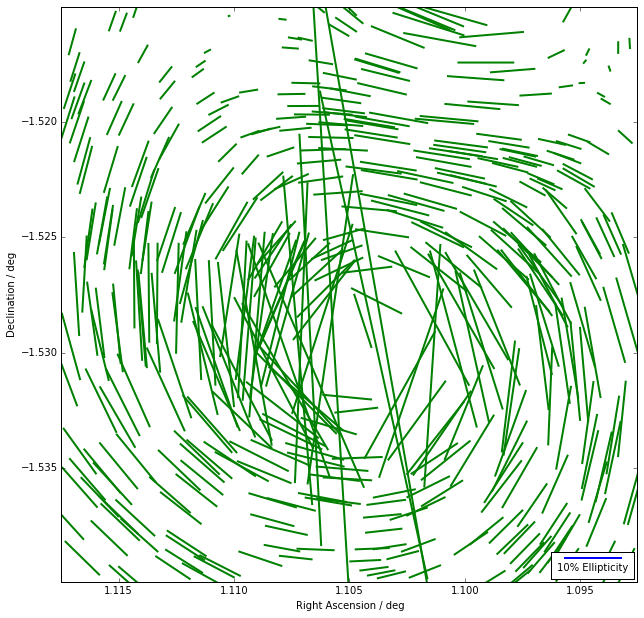

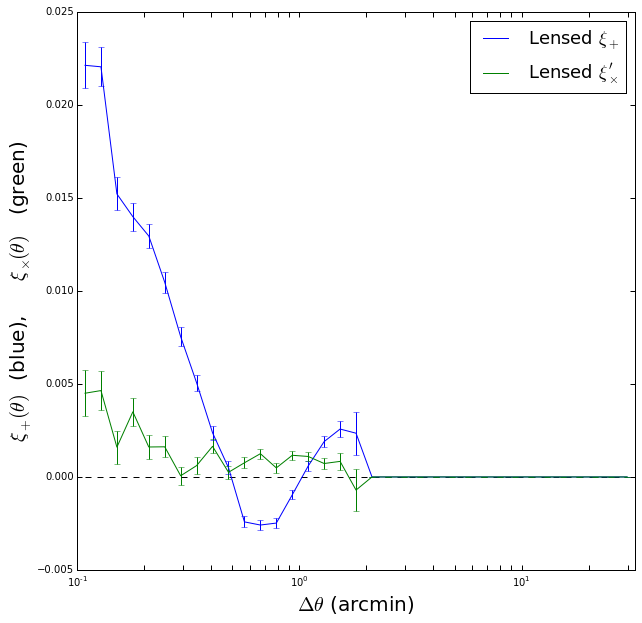

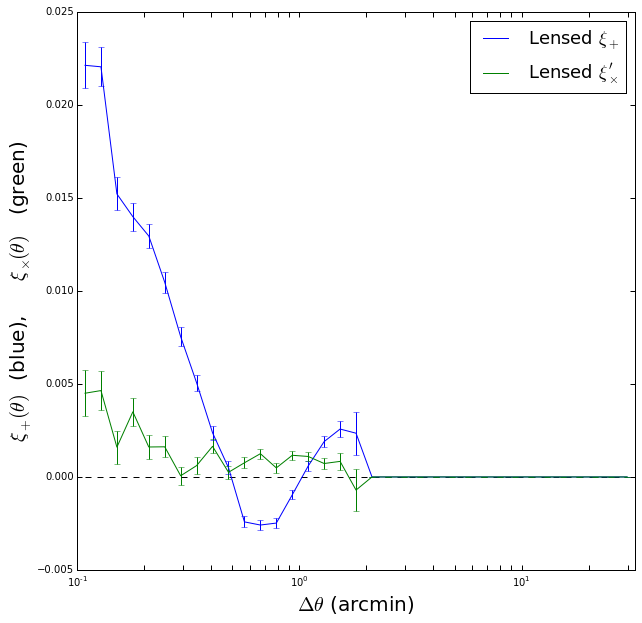

In [13]:
B.plot(graph='stick',lensed='map')
plt.show()
pangloss.plotting.plot_corr(gg)
plt.show()
pangloss.plotting.plot_corr(gg45)

## Comparing Correlation Functions

In [6]:
d = [1.7,1.3,-1.7,-1.3]
#d = [1.6,1.4,-1.6,-1.4]
B = pangloss.BackgroundCatalog(sigma_e=0.01,domain=d,field=[0,0,0,0])

config = pangloss.Configuration(PANGLOSS_DIR+'/example/example.config')
F = pangloss.ForegroundCatalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

In [7]:
B.lens_by_map(K,S)

In [8]:
B.drill_lightcones(foreground=F)
B.lens_by_halos()

0   0.0 %
576   10.0 %
1152   20.0 %
1728   30.0 %
2304   40.0 %
2880   50.0 %
3456   60.0 %
4032   70.0 %
4608   80.0 %
5184   90.0 %
0   0.0 %
576   10.0 %
1152   20.0 %
1728   30.0 %
2304   40.0 %
2880   50.0 %
3456   60.0 %
4032   70.0 %
4608   80.0 %
5184   90.0 %
average CPU time per background galaxy:  0.0473006731687 +/- 0.905503264576


In [9]:
gg_none = B.calculate_corr(corr_type='gg',max_sep=5,lensed='none')
gg_map = B.calculate_corr(corr_type='gg',max_sep=5,lensed='map')
gg_halo = B.calculate_corr(corr_type='gg',max_sep=5,lensed='halo')

ng_none = B.calculate_corr(corr_type='ng',max_sep=5,foreground=F,lensed='none')
ng_map = B.calculate_corr(corr_type='ng',max_sep=5,foreground=F,lensed='map')
ng_halo = B.calculate_corr(corr_type='ng',max_sep=5,foreground=F,lensed='halo')

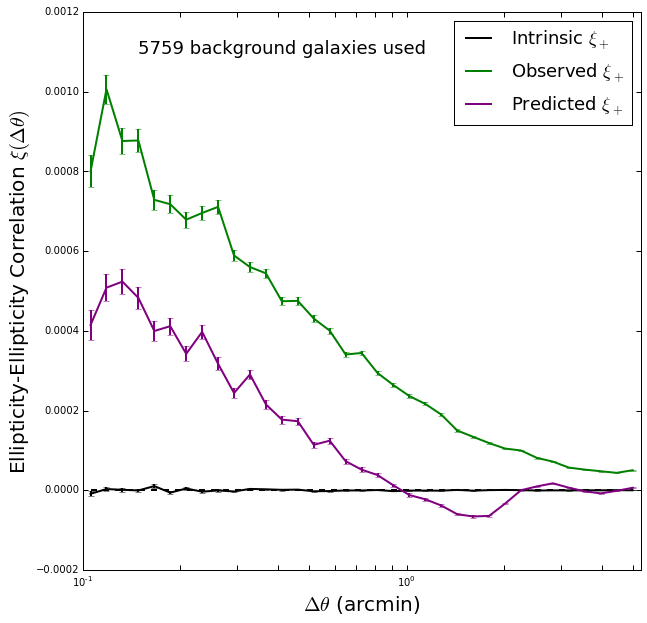

In [10]:
pangloss.plotting.plot_corr(gg_none,corr_type='gg',corr_comp='plus',lensed='none',galaxy_count=B.galaxy_count)
pangloss.plotting.plot_corr(gg_map,corr_type='gg',corr_comp='plus',lensed='map',color='green')
pangloss.plotting.plot_corr(gg_halo,corr_type='gg',corr_comp='plus',lensed='halo',color='purple')

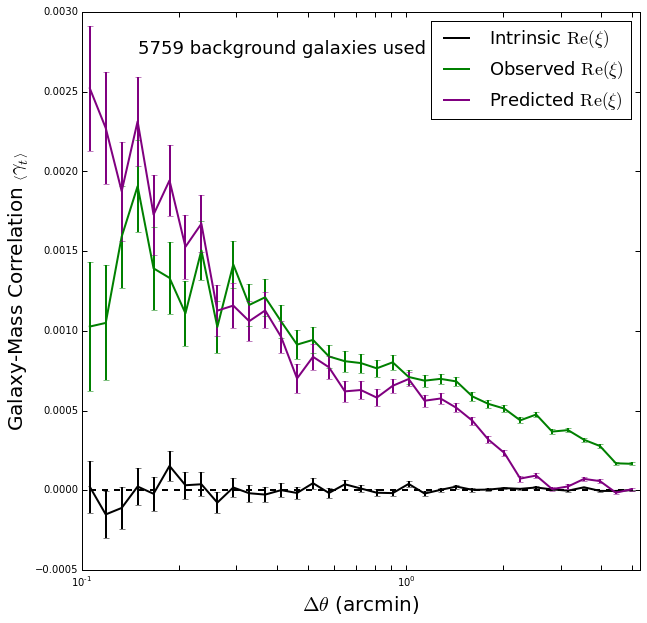

In [11]:
pangloss.plotting.plot_corr(ng_none,corr_type='ng',corr_comp='real',lensed='none',galaxy_count=B.galaxy_count)
pangloss.plotting.plot_corr(ng_map,corr_type='ng',corr_comp='real',lensed='map',color='green')
pangloss.plotting.plot_corr(ng_halo,corr_type='ng',corr_comp='real',lensed='halo',color='purple')

In [22]:
# Compare observed to predicted ng corr
chi2,n_sigma,percent_err,std_err = B.compare_corr(ng_halo,ng_map,corr_type='ng',corr_comp='real') 
print 'Intrinsic to mapped: ',chi2,n_sigma,percent_err,std_err

Intrinsic to mapped:  2101.40306366 56.462452846 65.4738644169 0.114559189434


In [23]:
# Compare observed to predicted gg corr
chi2,n_sigma,percent_err,std_err = B.compare_corr(gg_halo,gg_map,corr_type='gg',corr_comp='plus') 
print 'Intrinsic to mapped: ',chi2,n_sigma,percent_err,std_err

Intrinsic to mapped:  32383.8574339 246.128419072 100.289875579 0.0372897437981


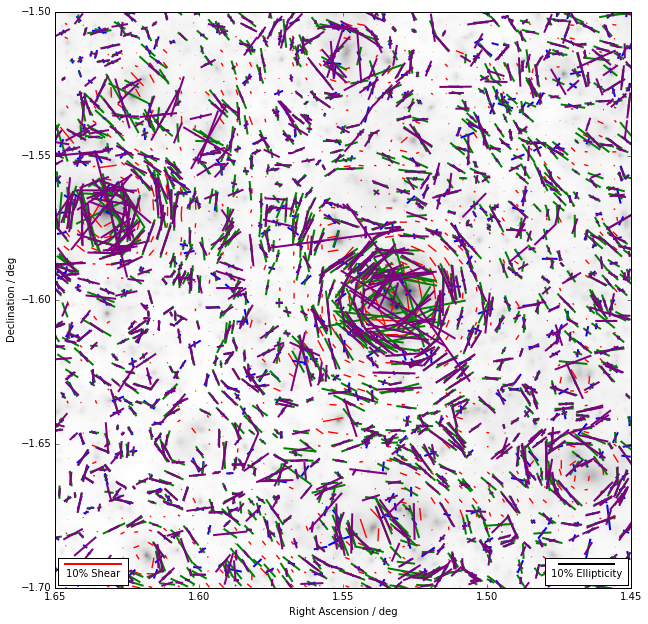

In [15]:
K.plot(subplot=[1.65,1.45,-1.7,-1.5])
S.plot()
B.plot(lensed='all',graph='stick')

## 45 Degree Offset

In [53]:
B.galaxies['ePhi_int'] += 45
B.galaxies['ePhi'] += 45
B.galaxies['ePhi_halo'] += 45

In [54]:
e_int = B.galaxies['eMod_int']*(np.cos(2*np.deg2rad(B.galaxies['ePhi_int']))+1j*np.sin(2*np.deg2rad(B.galaxies['ePhi_int'])))
B.galaxies['e1_int'] = e_int.real
B.galaxies['e2_int'] = e_int.imag

e = B.galaxies['eMod']*(np.cos(2*np.deg2rad(B.galaxies['ePhi']))+1j*np.sin(2*np.deg2rad(B.galaxies['ePhi'])))
B.galaxies['e1'] = e.real
B.galaxies['e2'] = e.imag

e_halo = B.galaxies['eMod_halo']*(np.cos(2*np.deg2rad(B.galaxies['ePhi_halo']))+1j*np.sin(2*np.deg2rad(B.galaxies['ePhi_halo'])))
B.galaxies['e1_halo'] = e_halo.real
B.galaxies['e2_halo'] = e_halo.imag

In [55]:
ng_none = B.calculate_corr(corr_type='ng',max_sep=5,foreground=F,lensed='none')
ng_map = B.calculate_corr(corr_type='ng',max_sep=5,foreground=F,lensed='map')
ng_halo = B.calculate_corr(corr_type='ng',max_sep=5,foreground=F,lensed='halo')

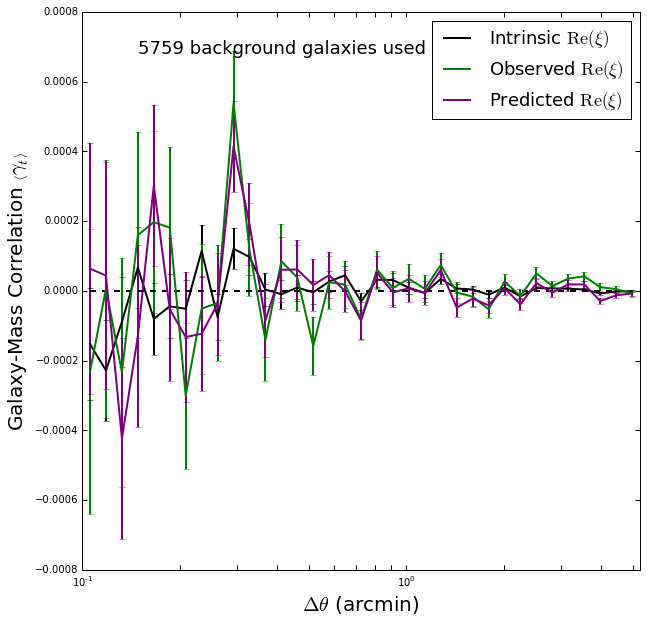

In [56]:
pangloss.plotting.plot_corr(ng_none,corr_type='ng',corr_comp='real',lensed='none',galaxy_count=B.galaxy_count)
pangloss.plotting.plot_corr(ng_map,corr_type='ng',corr_comp='real',lensed='map',color='green')
pangloss.plotting.plot_corr(ng_halo,corr_type='ng',corr_comp='real',lensed='halo',color='purple')

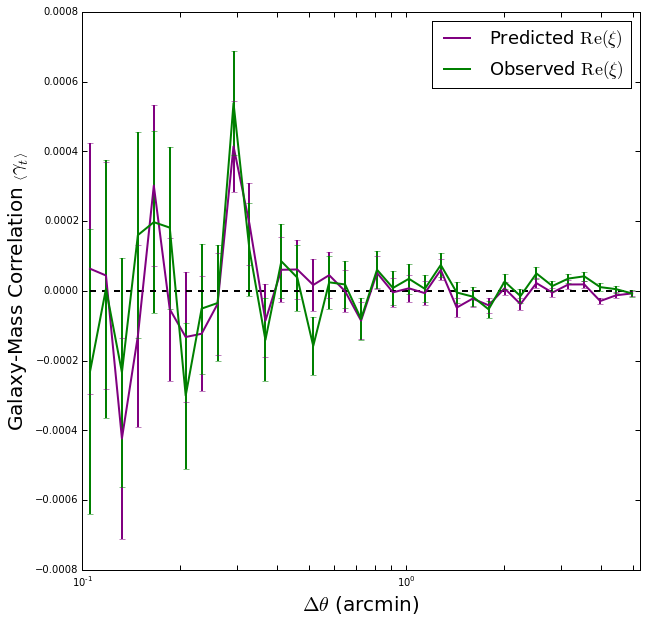

In [57]:
pangloss.plotting.plot_corr(ng_halo,corr_type='ng',corr_comp='real',lensed='halo',color='purple')
pangloss.plotting.plot_corr(ng_map,corr_type='ng',corr_comp='real',lensed='map',color='green')